In [1]:
from qiskit.quantum_info import Operator
from qiskit import QuantumCircuit
import numpy as np

In [2]:
def phase_oracle(n, solutions, name = 'Oracle'):
    qc = QuantumCircuit(n, name=name)

    oracle_matrix = np.identity(2**n)
    for solution in solutions:
        oracle_matrix[solution, solution] = -1
    qc.unitary(Operator(oracle_matrix), range(n))
    
    return qc

In [3]:
def diffuser(n):
    
    qc = QuantumCircuit(n, name='Diffuser')
    qc.h(range(n))
    qc.append(phase_oracle(n, [0]), range(n))
    qc.h(range(n))
    
    return qc

In [4]:
def Grover(n, solutions):
    
    qc = QuantumCircuit(n, n)
    
    r = int(np.floor(np.pi/4*np.sqrt(2**n/len(solutions))))
    print(f'{n} qubits, basis states {solutions} marked, {r} rounds')
    
    qc.h(range(n))
    for _ in range(r):
        qc.append(phase_oracle(n, solutions), range(n))
        qc.append(diffuser(n), range(n))
        
    qc.measure(range(n), range(n))
    return qc

circuit = Grover(8, [1, 42, 120, 199, 250])
circuit.draw(output='text')

8 qubits, basis states [1, 42, 120, 199, 250] marked, 5 rounds


┌───┐┌─────────┐┌───────────┐┌─────────┐┌───────────┐┌─────────┐»
q_0: ┤ H ├┤0        ├┤0          ├┤0        ├┤0          ├┤0        ├»
     ├───┤│         ││           ││         ││           ││         │»
q_1: ┤ H ├┤1        ├┤1          ├┤1        ├┤1          ├┤1        ├»
     ├───┤│         ││           ││         ││           ││         │»
q_2: ┤ H ├┤2        ├┤2          ├┤2        ├┤2          ├┤2        ├»
     ├───┤│         ││           ││         ││           ││         │»
q_3: ┤ H ├┤3        ├┤3          ├┤3        ├┤3          ├┤3        ├»
     ├───┤│  Oracle ││  Diffuser ││  Oracle ││  Diffuser ││  Oracle │»
q_4: ┤ H ├┤4        ├┤4          ├┤4        ├┤4          ├┤4        ├»
     ├───┤│         ││           ││         ││           ││         │»
q_5: ┤ H ├┤5        ├┤5          ├┤5        ├┤5          ├┤5        ├»
     ├───┤│         ││           ││         ││           ││         │»
q_6: ┤ H ├┤6        ├┤6          ├┤6        ├┤6          ├┤6        ├»
     ├───┤│         ││           ││         ││           ││         │»
q_7: ┤ H ├┤7        ├┤7          ├┤7        ├┤7          ├┤7        ├»
     └───┘└─────────┘└───────────┘└─────────┘└───────────┘└─────────┘»
c_0: ════════════════════════════════════════════════════════════════»
                                                                     »
c_1: ════════════════════════════════════════════════════════════════»
                                                                     »
c_2: ════════════════════════════════════════════════════════════════»
                                                                     »
c_3: ════════════════════════════════════════════════════════════════»
                                                                     »
c_4: ════════════════════════════════════════════════════════════════»
                                                                     »
c_5: ════════════════════════════════════════════════════════════════»
                                                                     »
c_6: ════════════════════════════════════════════════════════════════»
                                                                     »
c_7: ════════════════════════════════════════════════════════════════»
                                                                     »
«     ┌───────────┐┌─────────┐┌───────────┐┌─────────┐┌───────────┐┌─┐         »
«q_0: ┤0          ├┤0        ├┤0          ├┤0        ├┤0          ├┤M├─────────»
«     │           ││         ││           ││         ││           │└╥┘┌─┐      »
«q_1: ┤1          ├┤1        ├┤1          ├┤1        ├┤1          ├─╫─┤M├──────»
«     │           ││         ││           ││         ││           │ ║ └╥┘┌─┐   »
«q_2: ┤2          ├┤2        ├┤2          ├┤2        ├┤2          ├─╫──╫─┤M├───»
«     │           ││         ││           ││         ││           │ ║  ║ └╥┘┌─┐»
«q_3: ┤3          ├┤3        ├┤3          ├┤3        ├┤3          ├─╫──╫──╫─┤M├»
«     │  Diffuser ││  Oracle ││  Diffuser ││  Oracle ││  Diffuser │ ║  ║  ║ └╥┘»
«q_4: ┤4          ├┤4        ├┤4          ├┤4        ├┤4          ├─╫──╫──╫──╫─»
«     │           ││         ││           ││         ││           │ ║  ║  ║  ║ »
«q_5: ┤5          ├┤5        ├┤5          ├┤5        ├┤5          ├─╫──╫──╫──╫─»
«     │           ││         ││           ││         ││           │ ║  ║  ║  ║ »
«q_6: ┤6          ├┤6        ├┤6          ├┤6        ├┤6          ├─╫──╫──╫──╫─»
«     │           ││         ││           ││         ││           │ ║  ║  ║  ║ »
«q_7: ┤7          ├┤7        ├┤7          ├┤7        ├┤7          ├─╫──╫──╫──╫─»
«     └───────────┘└─────────┘└───────────┘└─────────┘└───────────┘ ║  ║  ║  ║ »
«c_0: ══════════════════════════════════════════════════════════════╩══╬══╬══╬═»
«                                                                      ║  ║  ║ »
«c_1: ═════════════════════════════════════════════════════════════════╩══╬══╬═»
«                                         

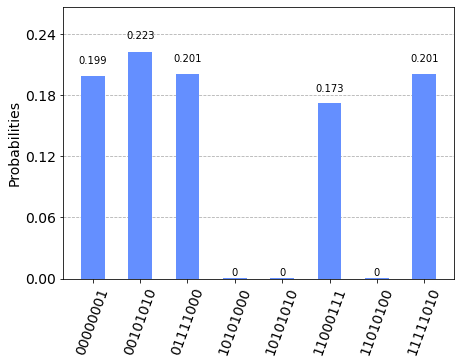

In [5]:
from qiskit import Aer, execute
simulator = Aer.get_backend('qasm_simulator')
counts = execute(circuit, backend=simulator).result().get_counts(circuit)
from qiskit.visualization import plot_histogram
plot_histogram(counts)